# Explore here

 1: Carga del Conjunto de Datos

In [3]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import zipfile
import os
import warnings


warnings.filterwarnings("ignore")

# Ruta al archivo zip
zip_file_path = 'G:\Mi unidad\Data Science\Practicas\Deep Learning\Proyecto-Tutorial-de-Clasficador-de-Imagenes\dogs-vs-cats.zip'

# Ruta al directorio donde deseas extraer los archivos
extract_dir = 'G:\Mi unidad\Data Science\Practicas\Deep Learning\Proyecto-Tutorial-de-Clasficador-de-Imagenes\\extracted_files'

# Crear directorio de extracción si no existe
os.makedirs(extract_dir, exist_ok=True)

# Extraer el archivo zip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f'Archivos extraídos en: {extract_dir}')


<>:14: SyntaxWarning: invalid escape sequence '\M'
<>:17: SyntaxWarning: invalid escape sequence '\M'
<>:14: SyntaxWarning: invalid escape sequence '\M'
<>:17: SyntaxWarning: invalid escape sequence '\M'
C:\Users\rgarciamontero\AppData\Local\Temp\ipykernel_9328\312491011.py:14: SyntaxWarning: invalid escape sequence '\M'
  zip_file_path = 'G:\Mi unidad\Data Science\Practicas\Deep Learning\Proyecto-Tutorial-de-Clasficador-de-Imagenes\dogs-vs-cats.zip'
C:\Users\rgarciamontero\AppData\Local\Temp\ipykernel_9328\312491011.py:17: SyntaxWarning: invalid escape sequence '\M'
  extract_dir = 'G:\Mi unidad\Data Science\Practicas\Deep Learning\Proyecto-Tutorial-de-Clasficador-de-Imagenes\\extracted_files'


Archivos extraídos en: G:\Mi unidad\Data Science\Practicas\Deep Learning\Proyecto-Tutorial-de-Clasficador-de-Imagenes\extracted_files


In [4]:
# Ruta al directorio que contiene sus datos de imagen
data_dir = os.path.join(extract_dir, 'G:\Mi unidad\Data Science\Practicas\Deep Learning\Proyecto-Tutorial-de-Clasficador-de-Imagenes\extracted_files\sampleSubmission.csv')

# Obtener una lista de todos los nombres de archivos de imágenes de perros
data = pd.read_csv(data_dir)

# Ver las primeras filas del DataFrame
data.head()


id  label
0   1      0
1   2      0
2   3      0
3   4      0
4   5      0

| Paso 2: Visualiza la información de entrada. Veamos cómo cargar y mostrar las imágenes.

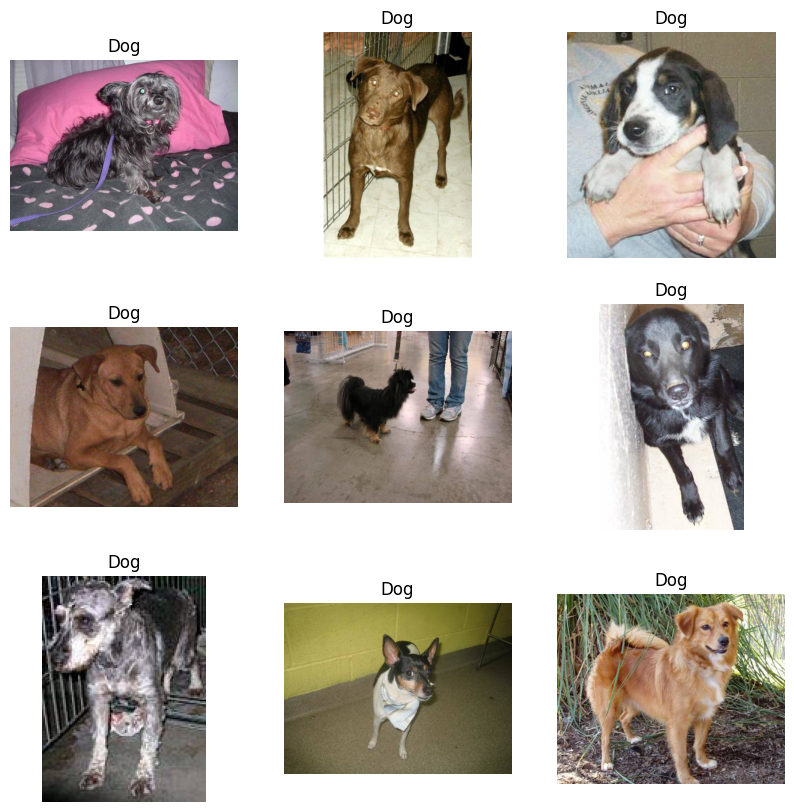

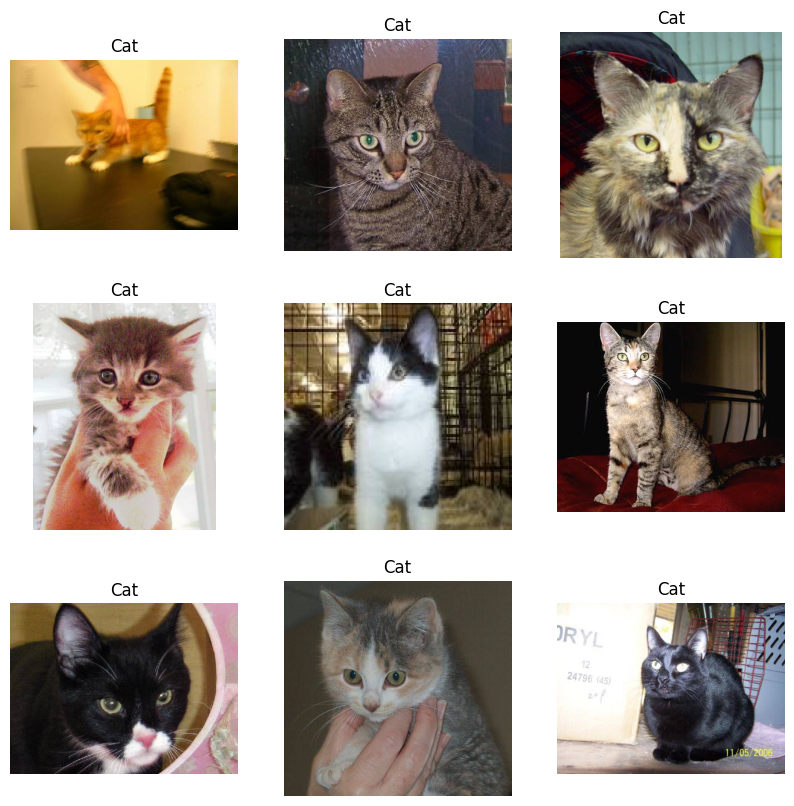

In [5]:

import matplotlib.image as mpimg
from keras.preprocessing.image import load_img, img_to_array
from pathlib import Path

# Define las rutas
train_dir = Path('train')

# Obtén los nombres de archivo
train_images = list(train_dir.glob('*.jpg'))
dog_images = [str(img) for img in train_images if 'dog' in str(img)]
cat_images = [str(img) for img in train_images if 'cat' in str(img)]

# Carga y muestra las primeras 9 imágenes de perros
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(mpimg.imread(dog_images[i]))
    plt.title("Dog")
    plt.axis('off')
plt.show()

# Carga y muestra las primeras 9 imágenes de gatos
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(mpimg.imread(cat_images[i]))
    plt.title("Cat")
    plt.axis('off')
plt.show()



Paso 3: Preprocesamiento del Conjunto de Datos
Redimensiona las imágenes a 200x200 píxeles y prepáralas para el entrenamiento:

In [43]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

from pathlib import Path

original_dir = Path('G:\Mi unidad\Data Science\Practicas\Deep Learning\Proyecto-Tutorial-de-Clasficador-de-Imagenes\src/train')

# Listar imágenes en original_dir
print("Contenido del directorio original:")
for img in original_dir.glob('*.jpg'):
    print(f"  Imagen encontrada: {img.name}")



Contenido del directorio original:
  Imagen encontrada: cat.0.jpg
  Imagen encontrada: cat.1.jpg
  Imagen encontrada: cat.10.jpg
  Imagen encontrada: cat.100.jpg
  Imagen encontrada: cat.1000.jpg
  Imagen encontrada: cat.10000.jpg
  Imagen encontrada: cat.10001.jpg
  Imagen encontrada: cat.10002.jpg
  Imagen encontrada: cat.10003.jpg
  Imagen encontrada: cat.10004.jpg
  Imagen encontrada: cat.10005.jpg
  Imagen encontrada: cat.10006.jpg
  Imagen encontrada: cat.10007.jpg
  Imagen encontrada: cat.10008.jpg
  Imagen encontrada: cat.10009.jpg
  Imagen encontrada: cat.1001.jpg
  Imagen encontrada: cat.10010.jpg
  Imagen encontrada: cat.10011.jpg
  Imagen encontrada: cat.10012.jpg
  Imagen encontrada: cat.10013.jpg
  Imagen encontrada: cat.10014.jpg
  Imagen encontrada: cat.10015.jpg
  Imagen encontrada: cat.10016.jpg
  Imagen encontrada: cat.10017.jpg
  Imagen encontrada: cat.10018.jpg
  Imagen encontrada: cat.10019.jpg
  Imagen encontrada: cat.1002.jpg
  Imagen encontrada: cat.10020.jpg
 

In [55]:
import os
import shutil

# Define la dirección del directorio original
original_dir = Path('G:\Mi unidad\Data Science\Practicas\Deep Learning\Proyecto-Tutorial-de-Clasficador-de-Imagenes\src/train')

# Define la nueva estructura de directorios
dogs_dir = Path('G:\Mi unidad\Data Science\Practicas\Deep Learning\Proyecto-Tutorial-de-Clasficador-de-Imagenes\src/train/dogs')
cats_dir = Path('G:\Mi unidad\Data Science\Practicas\Deep Learning\Proyecto-Tutorial-de-Clasficador-de-Imagenes\src/train/cats')

# Crea los directorios de perros y gatos si no existen
os.makedirs(dogs_dir, exist_ok=True)
os.makedirs(cats_dir, exist_ok=True)

# Mover imágenes a sus respectivas carpetas
for img_path in original_dir.glob('*.jpg'):
    if 'dog' in img_path.name.lower():  # Asegúrate de que estás usando el nombre correcto
        shutil.move(str(img_path), str(dogs_dir / img_path.name))
    elif 'cat' in img_path.name.lower():
        shutil.move(str(img_path), str(cats_dir / img_path.name))

print("Las imágenes han sido reubicadas a sus respectivos subdirectorios.")





Las imágenes han sido reubicadas a sus respectivos subdirectorios.


In [61]:
# Verificar contenido de las carpetas de perros y gatos
# Verificar la nueva estructura de directorios
print("Contenido de la carpeta 'train' después de mover las imágenes:")
for subdir in [dogs_dir, cats_dir]:
    print(f"Subdirectorio: {subdir}, Número de archivos: {len(list(subdir.glob('*.jpg')))}")



Contenido de la carpeta 'train' después de mover las imágenes:
Subdirectorio: G:\Mi unidad\Data Science\Practicas\Deep Learning\Proyecto-Tutorial-de-Clasficador-de-Imagenes\src\train\dogs, Número de archivos: 12500
Subdirectorio: G:\Mi unidad\Data Science\Practicas\Deep Learning\Proyecto-Tutorial-de-Clasficador-de-Imagenes\src\train\cats, Número de archivos: 12500


In [64]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Parámetros
img_width, img_height = 200, 200
batch_size = 32

# Crear generadores de datos
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    directory='G:\Mi unidad\Data Science\Practicas\Deep Learning\Proyecto-Tutorial-de-Clasficador-de-Imagenes\src/train',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'  # Para el entrenamiento
)

validation_generator = train_datagen.flow_from_directory(
    directory='G:\Mi unidad\Data Science\Practicas\Deep Learning\Proyecto-Tutorial-de-Clasficador-de-Imagenes\src/train',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'  # Para la validación
)



Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


4: Construcción de la Red Neuronal Convolucional (CNN)
Aquí definimos la arquitectura de la CNN.

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(img_width, img_height, 3)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Cambiado a 1 por ser clasificación binaria

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Paso 5: Entrenar y Evaluar el Modelo. Entrenamos el modelo con el conjunto de datos procesados.

In [66]:
epochs = 10

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)

# Evaluar el modelo
score = model.evaluate(validation_generator, verbose=1)
print(f'Loss: {score[0]} / Accuracy: {score[1]}')


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8407s 13s/step - accuracy: 0.4980 - loss: 0.6949 - val_accuracy: 0.5002 - val_loss: 0.6932
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3750 - val_loss: 0.6945
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8045s 13s/step - accuracy: 0.4998 - loss: 0.6932 - val_accuracy: 0.4996 - val_loss: 0.6932
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.6914
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7928s 13s/step - accuracy: 0.4831 - loss: 0.6932 - val_accuracy: 0.4998 - val_loss: 0.6931
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 0.6928
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7872s 13s/step - accuracy: 0.4991 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.00

Paso 6: Visualizar Resultados. Finalmente, visualiza la precisión y la pérdida durante el entrenamiento.

In [67]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Train and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Train and Validation Loss')

plt.show()


Accuracia (Precisión) Cercana al Azar: Los valores de precision cercanos a 0.5 en un problema de clasificación binaria indican que el modelo no está aprendiendo a distinguir entre las dos clases (perros y gatos) y podría estar adivinando la clase a ciegas.

Pérdida Constante: Una pérdida cercana a 0.693 (que es el valor de pérdida para un clasificador que adivina al azar usando la función de pérdida de entropía cruzada binaria) también sugiere que el modelo no está aprendiendo.

Inconsistencias entre Épocas: Vemos épocas con accuracy: 0.0000e+00 y loss: 0.0000e+00, lo que indica un problema posiblemente más técnico.

Para una implementación más simplificada y práctica, podrías revisar tu setup como sigue:

Paso 4: Optimiza el modelo anterior
Importa el método ModelCheckpoint y EarlyStopping de Keras. Crea un objeto de ambos y pásalo como funciones callback a fit_generator.

Carga el mejor modelo de los anteriores y utiliza el conjunto de test para hacer predicciones.

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Definir un modelo más simple
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Cambia a 1 neurona para salida binaria
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(train_generator, validation_data=validation_generator, epochs=10, verbose=1)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 971s 2s/step - accuracy: 0.5903 - loss: 0.6804 - val_accuracy: 0.6922 - val_loss: 0.5785
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 918s 1s/step - accuracy: 0.7165 - loss: 0.5548 - val_accuracy: 0.7342 - val_loss: 0.5383
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 870s 1s/step - accuracy: 0.7525 - loss: 0.5117 - val_accuracy: 0.7614 - val_loss: 0.4966
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 880s 1s/step - accuracy: 0.7769 - loss: 0.4726 - val_accuracy: 0.7670 - val_loss: 0.4872
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 877s 1s/step - accuracy: 0.8007 - loss: 0.4348 - val_accuracy: 0.7636 - val_loss: 0.4924
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 822s 1s/step - accuracy: 0.8178 - loss: 0.4115 - val_accuracy: 0.7706 - val_loss: 0.4774
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 823s 1s/step - accuracy: 0.8260 - loss: 0.3886 - val_accuracy: 0.7832 - val_loss: 0.4626
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 837s 1s/step - accuracy: 0.8466 - loss: 0.3590 - val_accu

In [6]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Train and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Train and Validation Loss')

plt.show()


NameError: name 'history' is not defined

In [76]:
from pathlib import Path

# Define la ruta al directorio del conjunto de pruebas
test_dir = Path('G:\Mi unidad\Data Science\Practicas\Deep Learning\Proyecto-Tutorial-de-Clasficador-de-Imagenes\src/test1')
print(f"Directorio del conjunto de pruebas: {test_dir.resolve()}")

# Verificar si el directorio existe y no está vacío
if not test_dir.exists() or not any(test_dir.glob('*.*')):
    print("El directorio no existe o no contiene imágenes.")
else:
    print("El directorio existe y contiene imágenes.")

# Listar contenido del directorio para verificar
print("Contenido del directorio de pruebas:")
for item in test_dir.iterdir():
    print(f"  {item.name} - {'Directorio' if item.is_dir() else 'Archivo'}")


Directorio del conjunto de pruebas: G:\Mi unidad\Data Science\Practicas\Deep Learning\Proyecto-Tutorial-de-Clasficador-de-Imagenes\src\test1
El directorio existe y contiene imágenes.
Contenido del directorio de pruebas:
  1.jpg - Archivo
  10.jpg - Archivo
  100.jpg - Archivo
  1000.jpg - Archivo
  10000.jpg - Archivo
  10001.jpg - Archivo
  10002.jpg - Archivo
  10003.jpg - Archivo
  10004.jpg - Archivo
  10005.jpg - Archivo
  10006.jpg - Archivo
  10007.jpg - Archivo
  10008.jpg - Archivo
  10009.jpg - Archivo
  1001.jpg - Archivo
  10010.jpg - Archivo
  10011.jpg - Archivo
  10012.jpg - Archivo
  10013.jpg - Archivo
  10014.jpg - Archivo
  10015.jpg - Archivo
  10016.jpg - Archivo
  10017.jpg - Archivo
  10018.jpg - Archivo
  10019.jpg - Archivo
  1002.jpg - Archivo
  10020.jpg - Archivo
  10021.jpg - Archivo
  10022.jpg - Archivo
  10023.jpg - Archivo
  10024.jpg - Archivo
  10025.jpg - Archivo
  10026.jpg - Archivo
  10027.jpg - Archivo
  10028.jpg - Archivo
  10029.jpg - Archivo


In [83]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Crear el generador de datos para el conjunto de pruebas
test_datagen = ImageDataGenerator(rescale=1./255)

# Crear el flujo de directorio sin clases específicas
test_generator = test_datagen.flow_from_directory(
    directory='G:/Mi unidad/Data Science/Practicas/Deep Learning/Proyecto-Tutorial-de-Clasficador-de-Imagenes/src',
    target_size=(200, 200),
    batch_size=32,
    class_mode=None,  # Ninguna clase, simplemente para puntuación
    shuffle=False  # No altera el orden de las imágenes
)


Found 37500 images belonging to 2 classes.


Paso 2: Evalúa el Modelo sobre el Conjunto de Pruebas
Una vez que tengas el generador de datos configurado para el conjunto de pruebas, puedes utilizarlo para evaluar tu modelo entrenado

Paso 4: Ejecutar Predicciones



In [84]:
# Tu modelo debería estar ya cargado o entrenado
predictions = model.predict(test_generator, verbose=1)

# Interpretar las predicciones según los ranges normalmente usados
for index, prediction in enumerate(predictions):
    print(f"Imagen {index}: {'Dog' if prediction > 0.5 else 'Cat'}")


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 1087s 926ms/step
Imagen 0: Dog
Imagen 1: Cat
Imagen 2: Cat
Imagen 3: Dog
Imagen 4: Dog
Imagen 5: Cat
Imagen 6: Cat
Imagen 7: Dog
Imagen 8: Cat
Imagen 9: Cat
Imagen 10: Cat
Imagen 11: Cat
Imagen 12: Cat
Imagen 13: Cat
Imagen 14: Cat
Imagen 15: Dog
Imagen 16: Dog
Imagen 17: Cat
Imagen 18: Cat
Imagen 19: Cat
Imagen 20: Dog
Imagen 21: Dog
Imagen 22: Cat
Imagen 23: Cat
Imagen 24: Cat
Imagen 25: Dog
Imagen 26: Cat
Imagen 27: Cat
Imagen 28: Dog
Imagen 29: Dog
Imagen 30: Dog
Imagen 31: Cat
Imagen 32: Dog
Imagen 33: Dog
Imagen 34: Cat
Imagen 35: Dog
Imagen 36: Dog
Imagen 37: Dog
Imagen 38: Dog
Imagen 39: Cat
Imagen 40: Dog
Imagen 41: Dog
Imagen 42: Cat
Imagen 43: Dog
Imagen 44: Cat
Imagen 45: Dog
Imagen 46: Dog
Imagen 47: Dog
Imagen 48: Cat
Imagen 49: Dog
Imagen 50: Dog
Imagen 51: Dog
Imagen 52: Cat
Imagen 53: Dog
Imagen 54: Dog
Imagen 55: Dog
Imagen 56: Dog
Imagen 57: Cat
Imagen 58: Cat
Imagen 59: Cat
Imagen 60: Dog
Imagen 61: Cat
Imagen 62: Dog
Imagen 63: Dog
Im